<a href="https://colab.research.google.com/github/JuDRoll/visualizacao-dados-python-3385168/blob/main/mlp_ar_poluicao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#instalação das bibliotecas de manipualção e visualização de dados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import seaborn as sns

#acesso ao dataset
from sklearn.datasets import fetch_openml

#classes do modelo de aprendizado
from sklearn.neural_network import MLPClassifier

#funções de avaliação dos modelos
from sklearn.metrics import classification_report, mean_squared_error, r2_score, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from scipy.stats import uniform, randint

import warnings
warnings.filterwarnings('ignore')

In [6]:
#fetch dataset
X,y = fetch_openml(data_id=46880, return_X_y=True)

dataset = pd.concat([X,y], axis=1)

dataset.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air_Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


In [7]:
#definindo semente
seed=27

#seleciona todos os campos menos a classe alvo para a variável "X".
X = dataset.iloc[:,:-1]
y = dataset.loc[:,"Air_Quality"]

#separando o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=seed)
print(X_train.shape)
print(X_test.shape)

(4500, 9)
(500, 9)


In [8]:
mlp = MLPClassifier(random_state=seed)

param_distributions = {
      'hidden_layer_sizes': [(64,), (128,), (64, 128), (32, 64, 128), (64, 128, 32)],
      'activation': ['logistic', 'tanh', 'relu'],
      'solver': ['lbfgs', 'sgd', 'adam'],
      'alpha': uniform(loc=0.0001, scale=0.01),
      'learning_rate': ['constant', 'adaptive'],
      'max_iter': randint(low=100, high=500)
}

random_search = RandomizedSearchCV(
        estimator=mlp,
        param_distributions=param_distributions,
        n_iter=20,
        cv=10,
        scoring='accuracy',
        random_state=seed,
        n_jobs=-1,
        return_train_score=True
)

random_search.fit(X_train, y_train)

#acessa o dicionário cv_results_
results_dict = random_search.cv_results_

#converte para DataFrame para uma melhor leitura
results_df = pd.DataFrame(results_dict)

print("Best parameters found:", random_search.best_params_)
print("Best cross-validation score:", random_search.best_score_)

results_df

Best parameters found: {'activation': 'logistic', 'alpha': np.float64(0.00011456695240487971), 'hidden_layer_sizes': (64, 128, 32), 'learning_rate': 'adaptive', 'max_iter': 359, 'solver': 'adam'}
Best cross-validation score: 0.9233333333333332


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_alpha,param_hidden_layer_sizes,param_learning_rate,param_max_iter,param_solver,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,7.065176,0.677569,0.006526,0.001078,logistic,0.008246,"(64,)",constant,393,lbfgs,...,0.821728,0.820988,0.817531,0.823951,0.806173,0.811852,0.810864,0.823457,0.814988,0.009015
1,20.597944,10.490619,0.012097,0.001614,tanh,0.003038,"(64, 128)",adaptive,291,adam,...,0.931852,0.927160,0.869136,0.936049,0.939259,0.851111,0.886914,0.883704,0.894864,0.033516
2,12.465410,4.755055,0.008941,0.001063,tanh,0.007518,"(128,)",constant,259,adam,...,0.928395,0.870370,0.867407,0.879753,0.917778,0.924938,0.920494,0.876049,0.898593,0.024370
3,11.913013,2.593795,0.007562,0.000296,logistic,0.000115,"(64, 128, 32)",adaptive,359,adam,...,0.940247,0.941481,0.938025,0.942716,0.924444,0.935062,0.941975,0.937778,0.934593,0.008051
4,16.318574,2.611583,0.007893,0.004388,relu,0.001611,"(64, 128)",adaptive,287,lbfgs,...,0.838519,0.824198,0.840988,0.828889,0.838025,0.831111,0.840494,0.831111,0.832444,0.006498
5,14.029082,8.597353,0.013756,0.003870,tanh,0.005757,"(64, 128)",adaptive,276,sgd,...,0.670864,0.654568,0.487901,0.449136,0.560988,0.483951,0.523704,0.479259,0.528494,0.073794
6,2.547838,0.392534,0.005178,0.001318,relu,0.006089,"(64,)",adaptive,251,lbfgs,...,0.811852,0.817284,0.808642,0.809877,0.811358,0.811605,0.813827,0.816790,0.812617,0.002690
7,5.134271,0.942722,0.007134,0.001818,tanh,0.002120,"(64,)",adaptive,128,lbfgs,...,0.786667,0.686667,0.771852,0.787407,0.688148,0.744938,0.780741,0.687901,0.742667,0.043192
8,7.599276,0.755647,0.005958,0.001357,logistic,0.007459,"(64,)",constant,416,lbfgs,...,0.810370,0.822469,0.814321,0.818025,0.820988,0.782963,0.821728,0.784938,0.808914,0.017091
9,25.824098,0.787533,0.011461,0.000997,tanh,0.007462,"(64, 128)",constant,208,lbfgs,...,0.818765,0.818025,0.770123,0.823210,0.820000,0.812099,0.792593,0.822469,0.811235,0.016046


              precision    recall  f1-score   support

        Good       1.00      1.00      1.00       200
   Hazardous       0.87      0.87      0.87        61
    Moderate       0.96      0.96      0.96       148
        Poor       0.85      0.85      0.85        91

    accuracy                           0.94       500
   macro avg       0.92      0.92      0.92       500
weighted avg       0.94      0.94      0.94       500



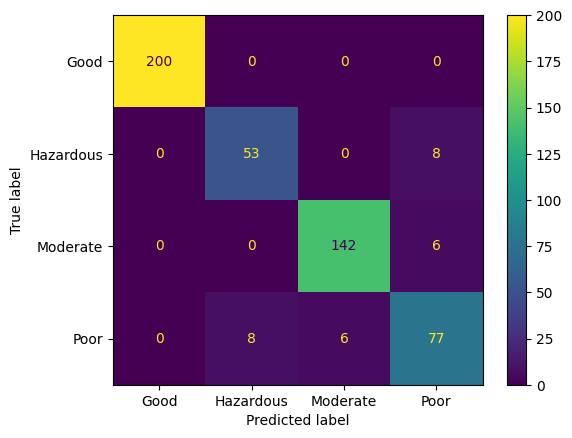

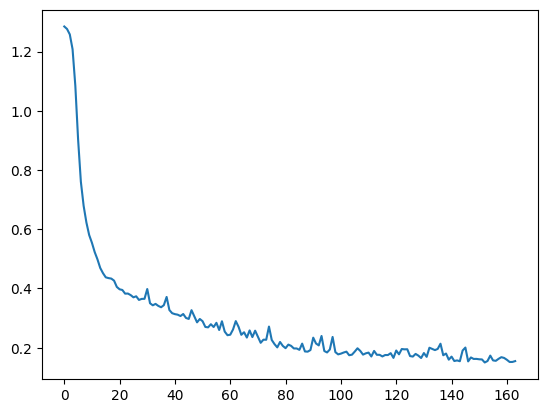

In [9]:
#definindo o modelo com os melhores parâmetros
model = MLPClassifier(random_state=seed, **random_search.best_params_)

#treinando o modelo
model.fit(X_train, y_train)

#predição
y_pred = model.predict(X_test)

#relatório do classificador
print(classification_report(y_test, y_pred))

#calcula a matriz de confusão de acordo com os parâmetros acima
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp_cm = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)

disp_cm.plot()

plt.show()

plt.plot(model.loss_curve_)